## Introduction
The following jupyter notebook deals with creating a number of features and storing them locally to use for analysis.

In [ ]:
#importing all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import calendar
from pandas.tseries.offsets import Day
from itertools import product

### 1.1 Import the data and create the anchor date columns

In [ ]:
txn = pd.read_csv("/content/drive/MyDrive/CHE1147/Retail_Data_Transactions.csv")
print("The number of rows in the dataset are",txn.shape[0])

The number of rows in the dataset are 125000


In [ ]:
txn['txn_date'] = pd.to_datetime(txn['trans_date'], infer_datetime_format=True)
txn.drop(columns = ['trans_date'], inplace = True)
txn

,customer_id,tran_amount,txn_date
0,CS5295,35,2013-02-11
1,CS4768,39,2015-03-15
2,CS2122,52,2013-02-26
3,CS1217,99,2011-11-16
4,CS1850,78,2013-11-20
...,...,...,...
124995,CS8433,64,2011-06-26
124996,CS7232,38,2014-08-19
124997,CS8731,42,2014-11-28
124998,CS8133,13,2013-12-14


In [ ]:
print("The minimum date in the dataset is",txn.txn_date.min().date())
print("The maximum date in the dataset is",txn.txn_date.max().date())

The minimum date in the dataset is 2011-05-16
The maximum date in the dataset is 2015-03-16


In [ ]:
txn['ME_DT'] = ""
txn['YEAR'] = ""
for i in range(txn.shape[0]):
  day = calendar.monthrange(txn.at[i, 'txn_date'].year, txn.at[i, 'txn_date'].month)[1]
  whole_date = str(txn.at[i, 'txn_date'].year) + str("-") + str(txn.at[i, 'txn_date'].month) + str("-") + str(day) 
  txn.at[i, 'ME_DT'] = pd.to_datetime(whole_date, infer_datetime_format=True).date()
  txn.at[i, 'YEAR'] = txn.at[i, 'txn_date'].year
txn

,customer_id,tran_amount,txn_date,ME_DT,YEAR
0,CS5295,35,2013-02-11,2013-02-28,2013
1,CS4768,39,2015-03-15,2015-03-31,2015
2,CS2122,52,2013-02-26,2013-02-28,2013
3,CS1217,99,2011-11-16,2011-11-30,2011
4,CS1850,78,2013-11-20,2013-11-30,2013
...,...,...,...,...,...
124995,CS8433,64,2011-06-26,2011-06-30,2011
124996,CS7232,38,2014-08-19,2014-08-31,2014
124997,CS8731,42,2014-11-28,2014-11-30,2014
124998,CS8133,13,2013-12-14,2013-12-31,2013


### 1.2 Create features that capture annual spending

In [ ]:
clnt_annual_aggregations = pd.DataFrame()
clnt_annual_aggregations['ann_txn_amt_sum'] = txn.groupby(['customer_id', 'YEAR']).agg("sum")
clnt_annual_aggregations['ann_txn_amt_ave'] = txn.groupby(['customer_id', 'YEAR']).agg("mean")
clnt_annual_aggregations['ann_txn_amt_std'] = txn.groupby(['customer_id', 'YEAR']).agg("std")
clnt_annual_aggregations['ann_txn_amt_var'] = txn.groupby(['customer_id', 'YEAR']).agg("var")
clnt_annual_aggregations['ann_txn_amt_sem'] = txn.groupby(['customer_id', 'YEAR']).agg("sem")
clnt_annual_aggregations['ann_txn_amt_max'] = txn.groupby(['customer_id', 'YEAR']).agg({'tran_amount': ["max"]})
clnt_annual_aggregations['ann_txn_amt_min'] = txn.groupby(['customer_id', 'YEAR']).agg({'tran_amount': ["min"]})
clnt_annual_aggregations['ann_txn_amt_cnt'] = txn.groupby(['customer_id', 'YEAR']).agg({'tran_amount': ["count"]})
clnt_annual_aggregations

ann_txn_amt_sum  ann_txn_amt_ave  ann_txn_amt_std  \
customer_id YEAR                                                      
CS1112      2011              212        70.666667        22.030282   
            2012              337        67.400000        12.720063   
            2013              212        70.666667        34.501208   
            2014              212        70.666667        16.862186   
            2015               39        39.000000              NaN   
...                           ...              ...              ...   
CS9000      2011               39        19.500000         4.949747   
            2012              216        54.000000        16.772994   
            2013              147        73.500000         3.535534   
            2014               97        24.250000         8.261356   
            2015               34        34.000000              NaN   

                  ann_txn_amt_var  ann_txn_amt_sem  ann_txn_amt_max  \
customer_id YEAR                                                      
CS1112      2011       485.333333        12.719189               96   
            2012       161.800000         5.688585               81   
            2013      1190.333333        19.919282              105   
            2014       284.333333         9.735388               90   
            2015              NaN              NaN               39   
...                           ...              ...              ...   
CS9000      2011        24.500000         3.500000               23   
            2012       281.333333         8.386497               77   
            2013        12.500000         2.500000               76   
            2014        68.250000         4.130678               35   
            2015              NaN              NaN               34   

                  ann_txn_amt_min  ann_txn_amt_cnt  
customer_id YEAR                                    
CS1112      2011               56                3  
            2012               52                5  
            2013               36                3  
            2014               59                3  
            2015               39                1  
...                           ...              ...  
CS9000      2011               16                2  
            2012               37                4  
            2013               71                2  
            2014               16                4  
            2015               34                1  

[31140 rows x 8 columns]

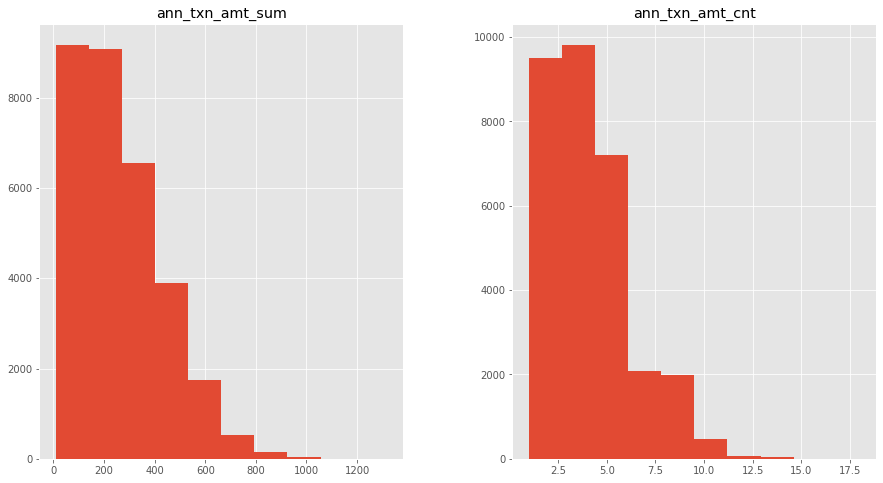

In [ ]:
clnt_annual_aggregations.hist(column=["ann_txn_amt_sum", "ann_txn_amt_cnt"], figsize=(15,8))
plt.show()

In [ ]:
clnt_annual_aggregations_pivot = clnt_annual_aggregations.unstack(level=1)
clnt_annual_aggregations_pivot.fillna(0, inplace = True)
clnt_annual_aggregations_pivot

ann_txn_amt_sum                             ann_txn_amt_ave  \
YEAR                   2011   2012   2013   2014   2015            2011   
customer_id                                                               
CS1112                212.0  337.0  212.0  212.0   39.0       70.666667   
CS1113                244.0  374.0  426.0  226.0  220.0       81.333333   
CS1114                426.0  150.0  352.0  425.0   79.0       85.200000   
CS1115                261.0  473.0  557.0  313.0   55.0       87.000000   
CS1116                235.0  230.0   59.0  333.0    0.0       58.750000   
...                     ...    ...    ...    ...    ...             ...   
CS8996                 62.0  101.0   83.0  336.0    0.0       31.000000   
CS8997                 90.0  158.0  211.0   84.0    0.0       45.000000   
CS8998                128.0  272.0   94.0  130.0    0.0       64.000000   
CS8999                156.0  101.0   84.0   42.0    0.0       52.000000   
CS9000                 39.0  216.0  147.0   97.0   34.0       19.500000   

                                                         ... ann_txn_amt_min  \
YEAR              2012       2013       2014       2015  ...            2011   
customer_id                                              ...                   
CS1112       67.400000  70.666667  70.666667  39.000000  ...            56.0   
CS1113       74.800000  85.200000  56.500000  73.333333  ...            57.0   
CS1114       75.000000  70.400000  70.833333  79.000000  ...            76.0   
CS1115       67.571429  79.571429  78.250000  55.000000  ...            72.0   
CS1116       76.666667  59.000000  66.600000   0.000000  ...            41.0   
...                ...        ...        ...        ...  ...             ...   
CS8996       33.666667  41.500000  56.000000   0.000000  ...            24.0   
CS8997       39.500000  35.166667  42.000000   0.000000  ...            43.0   
CS8998       54.400000  47.000000  32.500000   0.000000  ...            59.0   
CS8999       25.250000  28.000000  21.000000   0.000000  ...            31.0   
CS9000       54.000000  73.500000  24.250000  34.000000  ...            16.0   

                                    ann_txn_amt_cnt                      
YEAR         2012  2013  2014  2015            2011 2012 2013 2014 2015  
customer_id                                                              
CS1112       52.0  36.0  59.0  39.0             3.0  5.0  3.0  3.0  1.0  
CS1113       51.0  65.0  36.0  44.0             3.0  5.0  5.0  4.0  3.0  
CS1114       53.0  43.0  37.0  79.0             5.0  2.0  5.0  6.0  1.0  
CS1115       41.0  66.0  50.0  55.0             3.0  7.0  7.0  4.0  1.0  
CS1116       45.0  59.0  40.0   0.0             4.0  3.0  1.0  5.0  0.0  
...           ...   ...   ...   ...             ...  ...  ...  ...  ...  
CS8996       29.0  33.0  30.0   0.0             2.0  3.0  2.0  6.0  0.0  
CS8997       33.0  21.0  39.0   0.0             2.0  4.0  6.0  2.0  0.0  
CS8998       29.0  19.0  13.0   0.0             2.0  5.0  2.0  4.0  0.0  
CS8999       19.0  19.0  18.0   0.0             3.0  4.0  3.0  2.0  0.0  
CS9000       37.0  71.0  16.0  34.0             2.0  4.0  2.0  4.0  1.0  

[6889 rows x 40 columns]

- The 40 columns are having 5 years and 8 number of metrics per year. The NA value are appearing because client did not make a transaction in that year or the NA values might also occur due to single values as the number of transactions per year.

- As per the above case, it will not be a wise option to use means as option because the clients have not made any transactions thus filling the NA values using 0.

In [ ]:
print("The number of levels in the columns are ",clnt_annual_aggregations_pivot.columns.nlevels)
print("The columns are ",clnt_annual_aggregations_pivot.columns)

The number of levels in the columns are  2
The columns are  MultiIndex([('ann_txn_amt_sum', 2011),
            ('ann_txn_amt_sum', 2012),
            ('ann_txn_amt_sum', 2013),
            ('ann_txn_amt_sum', 2014),
            ('ann_txn_amt_sum', 2015),
            ('ann_txn_amt_ave', 2011),
            ('ann_txn_amt_ave', 2012),
            ('ann_txn_amt_ave', 2013),
            ('ann_txn_amt_ave', 2014),
            ('ann_txn_amt_ave', 2015),
            ('ann_txn_amt_std', 2011),
            ('ann_txn_amt_std', 2012),
            ('ann_txn_amt_std', 2013),
            ('ann_txn_amt_std', 2014),
            ('ann_txn_amt_std', 2015),
            ('ann_txn_amt_var', 2011),
            ('ann_txn_amt_var', 2012),
            ('ann_txn_amt_var', 2013),
            ('ann_txn_amt_var', 2014),
            ('ann_txn_amt_var', 2015),
            ('ann_txn_amt_sem', 2011),
            ('ann_txn_amt_sem', 2012),
            ('ann_txn_amt_sem', 2013),
            ('ann_txn_amt_sem', 2014),
    

- There are two levels of column indexes. 
- The first level of the dataset are the aggregations values and the second level of the index is year.
- The above the code states the first and second level of column names.

In [ ]:
level_0 = clnt_annual_aggregations_pivot.columns.get_level_values(0).astype ( str)
level_1 = clnt_annual_aggregations_pivot.columns.get_level_values(1).astype(str)
clnt_annual_aggregations_pivot.columns = level_0 + '_' + level_1
clnt_annual_aggregations_pivot

,ann_txn_amt_sum_2011,ann_txn_amt_sum_2012,ann_txn_amt_sum_2013,ann_txn_amt_sum_2014,ann_txn_amt_sum_2015,ann_txn_amt_ave_2011,ann_txn_amt_ave_2012,ann_txn_amt_ave_2013,ann_txn_amt_ave_2014,ann_txn_amt_ave_2015,...,ann_txn_amt_min_2011,ann_txn_amt_min_2012,ann_txn_amt_min_2013,ann_txn_amt_min_2014,ann_txn_amt_min_2015,ann_txn_amt_cnt_2011,ann_txn_amt_cnt_2012,ann_txn_amt_cnt_2013,ann_txn_amt_cnt_2014,ann_txn_amt_cnt_2015
customer_id,,,,,,,,,,,,,,,,,,,,,
CS1112,212.0,337.0,212.0,212.0,39.0,70.666667,67.400000,70.666667,70.666667,39.000000,...,56.0,52.0,36.0,59.0,39.0,3.0,5.0,3.0,3.0,1.0
CS1113,244.0,374.0,426.0,226.0,220.0,81.333333,74.800000,85.200000,56.500000,73.333333,...,57.0,51.0,65.0,36.0,44.0,3.0,5.0,5.0,4.0,3.0
CS1114,426.0,150.0,352.0,425.0,79.0,85.200000,75.000000,70.400000,70.833333,79.000000,...,76.0,53.0,43.0,37.0,79.0,5.0,2.0,5.0,6.0,1.0
CS1115,261.0,473.0,557.0,313.0,55.0,87.000000,67.571429,79.571429,78.250000,55.000000,...,72.0,41.0,66.0,50.0,55.0,3.0,7.0,7.0,4.0,1.0
CS1116,235.0,230.0,59.0,333.0,0.0,58.750000,76.666667,59.000000,66.600000,0.000000,...,41.0,45.0,59.0,40.0,0.0,4.0,3.0,1.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CS8996,62.0,101.0,83.0,336.0,0.0,31.000000,33.666667,41.500000,56.000000,0.000000,...,24.0,29.0,33.0,30.0,0.0,2.0,3.0,2.0,6.0,0.0
CS8997,90.0,158.0,211.0,84.0,0.0,45.000000,39.500000,35.166667,42.000000,0.000000,...,43.0,33.0,21.0,39.0,0.0,2.0,4.0,6.0,2.0,0.0
CS8998,128.0,272.0,94.0,130.0,0.0,64.000000,54.400000,47.000000,32.500000,0.000000,...,59.0,29.0,19.0,13.0,0.0,2.0,5.0,2.0,4.0,0.0


- The first line of the code get the column names for level 0 as string type.
- The second line of the code get the column names for level 1 as string type.
- The third line of the code adds the 1st and 2nd level columns values and adds underscore ("_") in between.
- While, the last line changes the column names that are computed in third line.

In [ ]:
clnt_annual_aggregations_pivot.to_excel("Retail_transactions_feature_engineered.xlsx")

### 1.3 Create monthly aggregations

In [ ]:
clnt_monthly_aggregations = pd.DataFrame()
clnt_monthly_aggregations['mth_txn_amt_sum'] = txn.groupby(['customer_id', 'ME_DT']).agg("sum")
clnt_monthly_aggregations['mth_txn_cnt'] = txn.groupby(['customer_id', 'ME_DT']).agg({'tran_amount': ["count"]})
clnt_monthly_aggregations

mth_txn_amt_sum  mth_txn_cnt
customer_id ME_DT                                   
CS1112      2011-06-30               56            1
            2011-08-31               96            1
            2011-10-31               60            1
            2012-04-30               56            1
            2012-06-30               52            1
...                                 ...          ...
CS9000      2014-01-31               16            1
            2014-05-31               20            1
            2014-07-31               26            1
            2014-08-31               35            1
            2015-02-28               34            1

[103234 rows x 2 columns]

In [ ]:
clnt_monthly_aggregations.loc[("CS1112")]

,mth_txn_amt_sum,mth_txn_cnt
ME_DT,,
2011-06-30,56,1
2011-08-31,96,1
2011-10-31,60,1
2012-04-30,56,1
2012-06-30,52,1
2012-07-31,81,1
2012-09-30,72,1
2012-12-31,76,1
2013-03-31,105,1


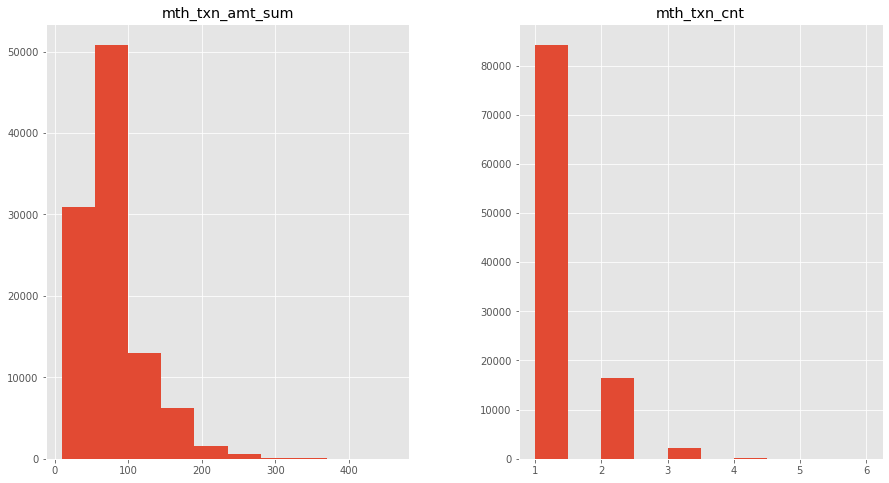

In [ ]:
clnt_monthly_aggregations.hist(figsize=(15,8))
plt.show()

- From the first histogram we can infer that the maximum amount of transactions that has happened are between 40\$ to 100\$ and the maximum amount that is spend around 400$.
 
- Most of the customers made one transaction in each month, the highest number of monthly transactions is six. 

- By comparing both the graphs we can see most of the customers shop only 6 times a year and thus we saw Nan values as client did made any transactions during rest of the months.

### 1.4 Create the base table for the rolling window features

In [ ]:
clnt_no = txn['customer_id'].unique()
me_dt = txn['ME_DT'].unique()
base_table = product(clnt_no, me_dt)
base_table_pd = pd.DataFrame.from_records(base_table, columns=['CLNT_NO', 'ME_DT'])
base_table_pd

,CLNT_NO,ME_DT
0,CS5295,2013-02-28
1,CS5295,2015-03-31
2,CS5295,2011-11-30
3,CS5295,2013-11-30
4,CS5295,2014-03-31
...,...,...
323778,CS8077,2011-08-31
323779,CS8077,2012-09-30
323780,CS8077,2014-09-30
323781,CS8077,2014-02-28


In [ ]:
print('The min date is',base_table_pd[(base_table_pd.CLNT_NO == 'CS1112')].ME_DT.min())
print('The max date is',base_table_pd[(base_table_pd.CLNT_NO == 'CS1112')].ME_DT.max())
print('The shape of the CS1112 client is',base_table_pd[(base_table_pd.CLNT_NO == 'CS1112')].shape)
print('The shape of the whole table is',base_table_pd.shape)

The min date is 2011-05-31
The max date is 2015-03-31
The shape of the CS1112 client is (47, 2)
The shape of the whole table is (323783, 2)


### 1.5 Create the monthly rolling window features

In [ ]:
clnt_monthly_aggregations.reset_index(inplace = True)

In [ ]:
clnt_monthly_aggregations.rename(columns={"customer_id": "CLNT_NO"}, inplace = True)

In [ ]:
clnt_monthly_aggregations

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt
0,CS1112,2011-06-30,56,1
1,CS1112,2011-08-31,96,1
2,CS1112,2011-10-31,60,1
3,CS1112,2012-04-30,56,1
4,CS1112,2012-06-30,52,1
...,...,...,...,...
103229,CS9000,2014-01-31,16,1
103230,CS9000,2014-05-31,20,1
103231,CS9000,2014-07-31,26,1
103232,CS9000,2014-08-31,35,1


In [ ]:
base_clnt_mth = pd.merge(left = base_table_pd, right = clnt_monthly_aggregations, how = 'left', left_on=['CLNT_NO','ME_DT'], right_on = ['CLNT_NO','ME_DT'])
base_clnt_mth

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt
0,CS5295,2013-02-28,35.0,1.0
1,CS5295,2015-03-31,NaN,NaN
2,CS5295,2011-11-30,132.0,2.0
3,CS5295,2013-11-30,NaN,NaN
4,CS5295,2014-03-31,NaN,NaN
...,...,...,...,...
323778,CS8077,2011-08-31,30.0,1.0
323779,CS8077,2012-09-30,NaN,NaN
323780,CS8077,2014-09-30,NaN,NaN
323781,CS8077,2014-02-28,NaN,NaN


- There are NaN values because some client did not process any transaction in that month hence as explained previously imputing these entries with zero.

In [ ]:
base_clnt_mth.fillna(0, inplace = True)

In [ ]:
print('The number of rows for base_clnt_mth is', base_clnt_mth.shape[0])
print('The number of rows for clnt_monthly_aggregations is', clnt_monthly_aggregations.shape[0])

The number of rows for base_clnt_mth is 323783
The number of rows for clnt_monthly_aggregations is 103234


In [ ]:
base_clnt_mth.sort_values(by=['CLNT_NO','ME_DT'],inplace=True)

- The clnt_monthly_aggregations has less number of rows in them as it contains data only when the transactions are happened. Thus, it does not contain all the values in it.

- While the base_clnt_mth is the table which contains every possible value of ME_DT and CLNT_NO and thus when it is combined or merged with the above dataset it has some Nan values as many clients are not having transactions every month.

In [ ]:
rolling_features_3M = base_clnt_mth.groupby('CLNT_NO').rolling(3).agg({'mth_txn_amt_sum':['sum','mean','max'], 'mth_txn_cnt' : ['sum','mean','max']})
rolling_features_3M.head()

mth_txn_amt_sum                  mth_txn_cnt               
                           sum       mean   max         sum      mean  max
CLNT_NO                                                                   
CS1112  157064             NaN        NaN   NaN         NaN       NaN  NaN
        157058             NaN        NaN   NaN         NaN       NaN  NaN
        157044            56.0  18.666667  56.0         1.0  0.333333  1.0
        157069           152.0  50.666667  96.0         2.0  0.666667  1.0
        157060            96.0  32.000000  96.0         1.0  0.333333  1.0

In [ ]:
rolling_features_6M = base_clnt_mth.groupby('CLNT_NO').rolling(6).agg({'mth_txn_amt_sum':['sum','mean','max'], 'mth_txn_cnt' : ['sum','mean','max']})
rolling_features_6M.head(10)

mth_txn_amt_sum                  mth_txn_cnt               
                           sum       mean   max         sum      mean  max
CLNT_NO                                                                   
CS1112  157064             NaN        NaN   NaN         NaN       NaN  NaN
        157058             NaN        NaN   NaN         NaN       NaN  NaN
        157044             NaN        NaN   NaN         NaN       NaN  NaN
        157069             NaN        NaN   NaN         NaN       NaN  NaN
        157060             NaN        NaN   NaN         NaN       NaN  NaN
        157048           212.0  35.333333  96.0         3.0  0.500000  1.0
        157029           212.0  35.333333  96.0         3.0  0.500000  1.0
        157049           156.0  26.000000  96.0         2.0  0.333333  1.0
        157046           156.0  26.000000  96.0         2.0  0.333333  1.0
        157032            60.0  10.000000  60.0         1.0  0.166667  1.0

In [ ]:
rolling_features_12M = base_clnt_mth.groupby('CLNT_NO').rolling(12).agg({'mth_txn_amt_sum':['sum','mean','max'], 'mth_txn_cnt' : ['sum','mean','max']})
rolling_features_12M.head(20)

mth_txn_amt_sum                  mth_txn_cnt               
                           sum       mean   max         sum      mean  max
CLNT_NO                                                                   
CS1112  157064             NaN        NaN   NaN         NaN       NaN  NaN
        157058             NaN        NaN   NaN         NaN       NaN  NaN
        157044             NaN        NaN   NaN         NaN       NaN  NaN
        157069             NaN        NaN   NaN         NaN       NaN  NaN
        157060             NaN        NaN   NaN         NaN       NaN  NaN
        157048             NaN        NaN   NaN         NaN       NaN  NaN
        157029             NaN        NaN   NaN         NaN       NaN  NaN
        157049             NaN        NaN   NaN         NaN       NaN  NaN
        157046             NaN        NaN   NaN         NaN       NaN  NaN
        157032             NaN        NaN   NaN         NaN       NaN  NaN
        157045             NaN        NaN   NaN         NaN       NaN  NaN
        157062           268.0  22.333333  96.0         4.0  0.333333  1.0
        157061           268.0  22.333333  96.0         4.0  0.333333  1.0
        157073           264.0  22.000000  96.0         4.0  0.333333  1.0
        157065           345.0  28.750000  96.0         5.0  0.416667  1.0
        157063           249.0  20.750000  81.0         4.0  0.333333  1.0
        157070           321.0  26.750000  81.0         5.0  0.416667  1.0
        157067           261.0  21.750000  81.0         4.0  0.333333  1.0
        157038           261.0  21.750000  81.0         4.0  0.333333  1.0
        157052           337.0  28.083333  81.0         5.0  0.416667  1.0

- The 3-month rolling window has 2 rows of NaN, 6-month rolling window has 5 rows of NaN, and 12-month rolling window has 11 rows of NaN.
- The NaN occurs because for 3-month rolling window it needs atleast 3 rows to calculate the average thus, the values will start from the 3rd row (2nd index).
- Thus, for nth rolling window, the table will have NaN values till (n-1)th row ((n-2)th index). 

In [ ]:
print("The number of levels in the index are :", rolling_features_3M.index.nlevels)
print("The number of levels in the columns are :", rolling_features_3M.columns.nlevels)

The number of levels in the index are : 2
The number of levels in the columns are : 2


- There are two levels for both index and columns. So they are MultiIndex dataframes.

In [ ]:
rolling_features_3M.columns = ('amt_sum_3M', 'amt_mean_3M', 'amt_max_3M','txn_cnt_sum_3M', 'txn_cnt_mean_3M', 'txn_cnt_max_3M')
rolling_features_3M.reset_index(inplace = True)
rolling_features_3M.set_index('level_1', inplace = True)
rolling_features_6M.columns = ('amt_sum_6M', 'amt_mean_6M', 'amt_max_6M','txn_cnt_sum_6M', 'txn_cnt_mean_6M', 'txn_cnt_max_6M')
rolling_features_6M.reset_index(inplace = True)
rolling_features_6M.set_index('level_1', inplace = True)
rolling_features_12M.columns = ('amt_sum_12M', 'amt_mean_12M', 'amt_max_12M','txn_cnt_sum_12M', 'txn_cnt_mean_12M', 'txn_cnt_max_12M')
rolling_features_12M.reset_index(inplace = True)
rolling_features_12M.set_index('level_1', inplace = True)

In [ ]:
all_rolling_features = pd.concat([base_clnt_mth, rolling_features_3M, rolling_features_6M, rolling_features_12M], axis=1)
all_rolling_features.drop(columns = ['CLNT_NO', 'ME_DT'], inplace = True)
all_rolling_features['CLNT_NO'] = base_clnt_mth['CLNT_NO']
all_rolling_features['ME_DT'] = base_clnt_mth['ME_DT']
all_rolling_features

,mth_txn_amt_sum,mth_txn_cnt,amt_sum_3M,amt_mean_3M,amt_max_3M,txn_cnt_sum_3M,txn_cnt_mean_3M,txn_cnt_max_3M,amt_sum_6M,amt_mean_6M,...,txn_cnt_mean_6M,txn_cnt_max_6M,amt_sum_12M,amt_mean_12M,amt_max_12M,txn_cnt_sum_12M,txn_cnt_mean_12M,txn_cnt_max_12M,CLNT_NO,ME_DT
157064,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CS1112,2011-05-31
157058,56.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CS1112,2011-06-30
157044,0.0,0.0,56.0,18.666667,56.0,1.0,0.333333,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CS1112,2011-07-31
157069,96.0,1.0,152.0,50.666667,96.0,2.0,0.666667,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CS1112,2011-08-31
157060,0.0,0.0,96.0,32.000000,96.0,1.0,0.333333,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CS1112,2011-09-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295140,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,61.0,10.166667,...,0.333333,1.0,97.0,8.083333,35.0,4.0,0.333333,1.0,CS9000,2014-11-30
295126,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,61.0,10.166667,...,0.333333,1.0,97.0,8.083333,35.0,4.0,0.333333,1.0,CS9000,2014-12-31
295119,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,35.0,5.833333,...,0.166667,1.0,81.0,6.750000,35.0,3.0,0.250000,1.0,CS9000,2015-01-31
295136,34.0,1.0,34.0,11.333333,34.0,1.0,0.333333,1.0,34.0,5.666667,...,0.166667,1.0,115.0,9.583333,35.0,4.0,0.333333,1.0,CS9000,2015-02-28


In [ ]:
#all_rolling_features.to_excel("all_rolling_features.xlsx")

### 1.6 Date-related features: date of the week

In [ ]:
txn['day_of_the_week'] = txn['txn_date'].dt.dayofweek
txn['day_name'] = txn['txn_date'].dt.day_name()
txn

,customer_id,tran_amount,txn_date,ME_DT,YEAR,day_of_the_week,day_name
0,CS5295,35,2013-02-11,2013-02-28,2013,0,Monday
1,CS4768,39,2015-03-15,2015-03-31,2015,6,Sunday
2,CS2122,52,2013-02-26,2013-02-28,2013,1,Tuesday
3,CS1217,99,2011-11-16,2011-11-30,2011,2,Wednesday
4,CS1850,78,2013-11-20,2013-11-30,2013,2,Wednesday
...,...,...,...,...,...,...,...
124995,CS8433,64,2011-06-26,2011-06-30,2011,6,Sunday
124996,CS7232,38,2014-08-19,2014-08-31,2014,1,Tuesday
124997,CS8731,42,2014-11-28,2014-11-30,2014,4,Friday
124998,CS8133,13,2013-12-14,2013-12-31,2013,5,Saturday


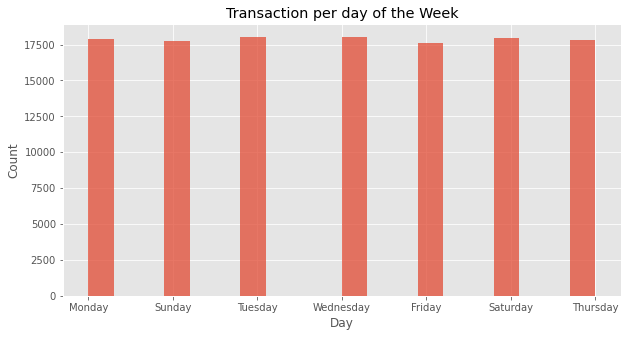

In [ ]:
fig = plt.figure(figsize = (10,5))
plt.hist(txn['day_name'],bins=20, alpha=0.75)
plt.title('Transaction per day of the Week')
plt.xlabel('Day')
plt.ylabel('Count')
plt.show()

In [ ]:
annual_day_of_week_counts = pd.DataFrame()
annual_day_of_week_counts['cnt'] = txn.groupby(['customer_id', 'YEAR', 'day_name']).agg({'tran_amount': ["count"]})
annual_day_of_week_counts

cnt
customer_id YEAR day_name      
CS1112      2011 Friday       1
                 Sunday       1
                 Wednesday    1
            2012 Saturday     1
                 Sunday       3
...                         ...
CS9000      2013 Tuesday      1
            2014 Sunday       2
                 Thursday     1
                 Tuesday      1
            2015 Saturday     1

[93736 rows x 1 columns]

In [ ]:
annual_day_of_week_counts_pivot = annual_day_of_week_counts.unstack(level=1)
annual_day_of_week_counts_pivot = annual_day_of_week_counts_pivot.unstack(level=1)
annual_day_of_week_counts_pivot.fillna(int(0), inplace = True)
annual_day_of_week_counts_pivot

cnt                                                           \
YEAR          2011                                                     2012   
day_name    Friday Monday Saturday Sunday Thursday Tuesday Wednesday Friday   
customer_id                                                                   
CS1112         1.0    0.0      0.0    1.0      0.0     0.0       1.0    0.0   
CS1113         1.0    1.0      0.0    1.0      0.0     0.0       0.0    2.0   
CS1114         0.0    1.0      0.0    1.0      1.0     0.0       2.0    0.0   
CS1115         0.0    0.0      1.0    1.0      0.0     0.0       1.0    1.0   
CS1116         1.0    1.0      0.0    0.0      1.0     1.0       0.0    1.0   
...            ...    ...      ...    ...      ...     ...       ...    ...   
CS8996         0.0    1.0      0.0    0.0      0.0     1.0       0.0    0.0   
CS8997         0.0    0.0      0.0    0.0      1.0     0.0       1.0    1.0   
CS8998         0.0    0.0      0.0    0.0      0.0     1.0       1.0    2.0   
CS8999         0.0    1.0      1.0    0.0      0.0     1.0       0.0    1.0   
CS9000         0.0    0.0      0.0    2.0      0.0     0.0       0.0    1.0   

                             ...                                           \
YEAR                         ...     2014                     2015          
day_name    Monday Saturday  ... Thursday Tuesday Wednesday Friday Monday   
customer_id                  ...                                            
CS1112         0.0      1.0  ...      1.0     1.0       1.0    0.0    0.0   
CS1113         1.0      0.0  ...      0.0     3.0       0.0    0.0    2.0   
CS1114         0.0      1.0  ...      0.0     1.0       1.0    0.0    0.0   
CS1115         1.0      0.0  ...      2.0     0.0       2.0    0.0    0.0   
CS1116         0.0      0.0  ...      0.0     0.0       0.0    0.0    0.0   
...            ...      ...  ...      ...     ...       ...    ...    ...   
CS8996         0.0      3.0  ...      1.0     1.0       2.0    0.0    0.0   
CS8997         2.0      0.0  ...      0.0     0.0       0.0    0.0    0.0   
CS8998         0.0      0.0  ...      0.0     1.0       1.0    0.0    0.0   
CS8999         0.0      2.0  ...      0.0     0.0       2.0    0.0    0.0   
CS9000         0.0      1.0  ...      1.0     1.0       0.0    0.0    0.0   

                                                        
YEAR                                                    
day_name    Saturday Sunday Thursday Tuesday Wednesday  
customer_id                                             
CS1112           0.0    0.0      0.0     0.0       1.0  
CS1113           0.0    0.0      0.0     0.0       1.0  
CS1114           0.0    0.0      1.0     0.0       0.0  
CS1115           0.0    0.0      1.0     0.0       0.0  
CS1116           0.0    0.0      0.0     0.0       0.0  
...              ...    ...      ...     ...       ...  
CS8996           0.0    0.0      0.0     0.0       0.0  
CS8997           0.0    0.0      0.0     0.0       0.0  
CS8998           0.0    0.0      0.0     0.0       0.0  
CS8999           0.0    0.0      0.0     0.0       0.0  
CS9000           1.0    0.0      0.0     0.0       0.0  

[6889 rows x 35 columns]

- There are 35 features/columns in this section which is due to 5 years of transaction multiplied by the number of days in a week. (7*5)

In [ ]:
level_0 = annual_day_of_week_counts_pivot.columns.get_level_values(0).astype ( str)
level_1 = annual_day_of_week_counts_pivot.columns.get_level_values(1).astype(str)
level_2 = annual_day_of_week_counts_pivot.columns.get_level_values(2).astype(str)
annual_day_of_week_counts_pivot.columns = level_0 + '_' + level_1 + '_' + level_2
annual_day_of_week_counts_pivot

,cnt_2011_Friday,cnt_2011_Monday,cnt_2011_Saturday,cnt_2011_Sunday,cnt_2011_Thursday,cnt_2011_Tuesday,cnt_2011_Wednesday,cnt_2012_Friday,cnt_2012_Monday,cnt_2012_Saturday,...,cnt_2014_Thursday,cnt_2014_Tuesday,cnt_2014_Wednesday,cnt_2015_Friday,cnt_2015_Monday,cnt_2015_Saturday,cnt_2015_Sunday,cnt_2015_Thursday,cnt_2015_Tuesday,cnt_2015_Wednesday
customer_id,,,,,,,,,,,,,,,,,,,,,
CS1112,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
CS1113,1.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,...,0.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0
CS1114,0.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
CS1115,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,2.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
CS1116,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CS8996,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,...,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CS8997,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CS8998,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
annual_day_of_week_counts_pivot.to_excel("annual_day_of_week_counts_pivot.xlsx")

In [ ]:
mth_day_of_week_counts = pd.DataFrame()
mth_day_of_week_counts['cnt'] = txn.groupby(['customer_id', 'ME_DT', 'day_name']).agg({'tran_amount': ["count"]})
mth_day_of_week_counts

cnt
customer_id ME_DT      day_name      
CS1112      2011-06-30 Wednesday    1
            2011-08-31 Friday       1
            2011-10-31 Sunday       1
            2012-04-30 Sunday       1
            2012-06-30 Sunday       1
...                               ...
CS9000      2014-01-31 Sunday       1
            2014-05-31 Thursday     1
            2014-07-31 Tuesday      1
            2014-08-31 Sunday       1
            2015-02-28 Saturday     1

[121512 rows x 1 columns]

In [ ]:
mth_day_of_week_counts_pivot = mth_day_of_week_counts.unstack(level=2)
mth_day_of_week_counts_pivot.fillna(int(0), inplace = True)
mth_day_of_week_counts_pivot

cnt                                          \
day_name               Friday Monday Saturday Sunday Thursday Tuesday   
customer_id ME_DT                                                       
CS1112      2011-06-30    0.0    0.0      0.0    0.0      0.0     0.0   
            2011-08-31    1.0    0.0      0.0    0.0      0.0     0.0   
            2011-10-31    0.0    0.0      0.0    1.0      0.0     0.0   
            2012-04-30    0.0    0.0      0.0    1.0      0.0     0.0   
            2012-06-30    0.0    0.0      0.0    1.0      0.0     0.0   
...                       ...    ...      ...    ...      ...     ...   
CS9000      2014-01-31    0.0    0.0      0.0    1.0      0.0     0.0   
            2014-05-31    0.0    0.0      0.0    0.0      1.0     0.0   
            2014-07-31    0.0    0.0      0.0    0.0      0.0     1.0   
            2014-08-31    0.0    0.0      0.0    1.0      0.0     0.0   
            2015-02-28    0.0    0.0      1.0    0.0      0.0     0.0   

                                  
day_name               Wednesday  
customer_id ME_DT                 
CS1112      2011-06-30       1.0  
            2011-08-31       0.0  
            2011-10-31       0.0  
            2012-04-30       0.0  
            2012-06-30       0.0  
...                          ...  
CS9000      2014-01-31       0.0  
            2014-05-31       0.0  
            2014-07-31       0.0  
            2014-08-31       0.0  
            2015-02-28       0.0  

[103234 rows x 7 columns]

In [ ]:
level_0 = mth_day_of_week_counts_pivot.columns.get_level_values(0).astype ( str)
level_1 = mth_day_of_week_counts_pivot.columns.get_level_values(1).astype(str)
mth_day_of_week_counts_pivot.columns = level_0 + '_' + level_1
mth_day_of_week_counts_pivot

cnt_Friday  cnt_Monday  cnt_Saturday  cnt_Sunday  \
customer_id ME_DT                                                          
CS1112      2011-06-30         0.0         0.0           0.0         0.0   
            2011-08-31         1.0         0.0           0.0         0.0   
            2011-10-31         0.0         0.0           0.0         1.0   
            2012-04-30         0.0         0.0           0.0         1.0   
            2012-06-30         0.0         0.0           0.0         1.0   
...                            ...         ...           ...         ...   
CS9000      2014-01-31         0.0         0.0           0.0         1.0   
            2014-05-31         0.0         0.0           0.0         0.0   
            2014-07-31         0.0         0.0           0.0         0.0   
            2014-08-31         0.0         0.0           0.0         1.0   
            2015-02-28         0.0         0.0           1.0         0.0   

                        cnt_Thursday  cnt_Tuesday  cnt_Wednesday  
customer_id ME_DT                                                 
CS1112      2011-06-30           0.0          0.0            1.0  
            2011-08-31           0.0          0.0            0.0  
            2011-10-31           0.0          0.0            0.0  
            2012-04-30           0.0          0.0            0.0  
            2012-06-30           0.0          0.0            0.0  
...                              ...          ...            ...  
CS9000      2014-01-31           0.0          0.0            0.0  
            2014-05-31           1.0          0.0            0.0  
            2014-07-31           0.0          1.0            0.0  
            2014-08-31           0.0          0.0            0.0  
            2015-02-28           0.0          0.0            0.0  

[103234 rows x 7 columns]

In [ ]:
mth_day_of_week_counts_pivot.reset_index(inplace = True)
mth_day_counts = pd.merge(left = base_table_pd, right = mth_day_of_week_counts_pivot, how = 'left', left_on=['CLNT_NO','ME_DT'], right_on = ['customer_id','ME_DT'])
mth_day_counts.drop(columns = 'customer_id', inplace = True)
mth_day_counts.fillna(0, inplace = True)
mth_day_counts

,CLNT_NO,ME_DT,cnt_Friday,cnt_Monday,cnt_Saturday,cnt_Sunday,cnt_Thursday,cnt_Tuesday,cnt_Wednesday
0,CS5295,2013-02-28,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,CS5295,2015-03-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CS5295,2011-11-30,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,CS5295,2013-11-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CS5295,2014-03-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
323778,CS8077,2011-08-31,0.0,0.0,0.0,1.0,0.0,0.0,0.0
323779,CS8077,2012-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0
323780,CS8077,2014-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0
323781,CS8077,2014-02-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
mth_day_counts.to_excel("mth_day_counts.xlsx")

### 1.7 Date-related features: days since last transaction

In [ ]:
last_monthly_purchase = pd.DataFrame()
last_monthly_purchase['last_monthly_purchase'] = txn.groupby(['customer_id', 'ME_DT']).agg({'txn_date': ["max"]})
last_monthly_purchase

last_monthly_purchase
customer_id ME_DT                           
CS1112      2011-06-30            2011-06-15
            2011-08-31            2011-08-19
            2011-10-31            2011-10-02
            2012-04-30            2012-04-08
            2012-06-30            2012-06-24
...                                      ...
CS9000      2014-01-31            2014-01-12
            2014-05-31            2014-05-08
            2014-07-31            2014-07-08
            2014-08-31            2014-08-24
            2015-02-28            2015-02-28

[103234 rows x 1 columns]

In [ ]:
last_monthly_purchase.reset_index(inplace = True)
last_monthly_purchase_base = pd.merge(left = base_table_pd, right = last_monthly_purchase, how = 'left', left_on=['CLNT_NO','ME_DT'], right_on = ['customer_id','ME_DT'])
last_monthly_purchase_base.drop(columns = 'customer_id', inplace = True)
last_monthly_purchase_base.sort_values(by = ['CLNT_NO', 'ME_DT'], inplace = True)
last_monthly_purchase_base.loc[last_monthly_purchase_base['CLNT_NO'] == 'CS1112'].head()

,CLNT_NO,ME_DT,last_monthly_purchase
157064,CS1112,2011-05-31,NaT
157058,CS1112,2011-06-30,2011-06-15
157044,CS1112,2011-07-31,NaT
157069,CS1112,2011-08-31,2011-08-19
157060,CS1112,2011-09-30,NaT


- I will forward fill the NaT values as per suggested in the assignment in the next section because it makes sense to fill to fill the same previous value for each client as we computing last_monthly_pruchase.

In [ ]:
last_monthly_purchase_base= last_monthly_purchase_base.groupby('CLNT_NO').apply(lambda x: x.ffill())
last_monthly_purchase_base.iloc[92:98]

,CLNT_NO,ME_DT,last_monthly_purchase
160011,CS1113,2015-02-28,2015-02-09
159989,CS1113,2015-03-31,2015-02-09
101134,CS1114,2011-05-31,NaT
101128,CS1114,2011-06-30,NaT
101114,CS1114,2011-07-31,2011-07-14
101139,CS1114,2011-08-31,2011-08-24


In [ ]:
last_monthly_purchase_base['ME_DT'] = pd.to_datetime(last_monthly_purchase_base['ME_DT'])
last_monthly_purchase_base['days_since_last_txn'] = (last_monthly_purchase_base['ME_DT']-last_monthly_purchase_base['last_monthly_purchase']).dt.days
last_monthly_purchase_base

,CLNT_NO,ME_DT,last_monthly_purchase,days_since_last_txn
157064,CS1112,2011-05-31,NaT,NaN
157058,CS1112,2011-06-30,2011-06-15,15.0
157044,CS1112,2011-07-31,2011-06-15,46.0
157069,CS1112,2011-08-31,2011-08-19,12.0
157060,CS1112,2011-09-30,2011-08-19,42.0
...,...,...,...,...
295140,CS9000,2014-11-30,2014-08-24,98.0
295126,CS9000,2014-12-31,2014-08-24,129.0
295119,CS9000,2015-01-31,2014-08-24,160.0
295136,CS9000,2015-02-28,2015-02-28,0.0


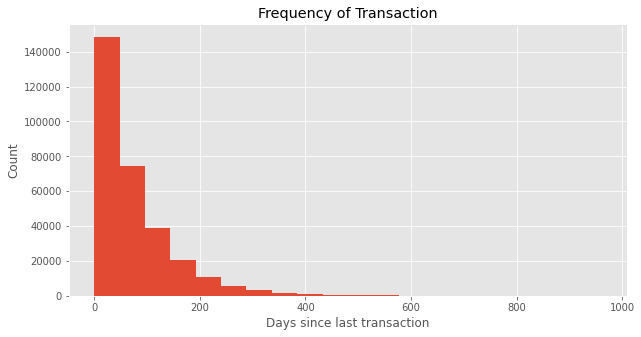

In [ ]:
last_monthly_purchase_base['days_since_last_txn'].hist(bins=20, figsize = (10,5))
plt.title('Frequency of Transaction')
plt.ylabel('Count')
plt.xlabel('Days since last transaction')
plt.show()

- From the histogram, we can see that the distribution is highly skewed, so median is better to describe the average days between transactions as compared to other values.
-  Thus, all the NaT values in last_monthly_purchase are filled with the difference between ME_DT and median values of the days_since_last_transaction.
- Then again calculating the difference between tranaction and last day of the tranaction to fill the last column of the dataset.

In [ ]:
date_median = last_monthly_purchase_base['days_since_last_txn'].median()
last_monthly_purchase_base['last_monthly_purchase'] = last_monthly_purchase_base['last_monthly_purchase'].fillna(last_monthly_purchase_base['ME_DT']-Day(date_median))
last_monthly_purchase_base['days_since_last_txn'] = (last_monthly_purchase_base['ME_DT']-last_monthly_purchase_base['last_monthly_purchase']).dt.days
last_monthly_purchase_base.head()

,CLNT_NO,ME_DT,last_monthly_purchase,days_since_last_txn
157064,CS1112,2011-05-31,2011-04-10,51
157058,CS1112,2011-06-30,2011-06-15,15
157044,CS1112,2011-07-31,2011-06-15,46
157069,CS1112,2011-08-31,2011-08-19,12
157060,CS1112,2011-09-30,2011-08-19,42


In [ ]:
last_monthly_purchase_base.to_excel('last_monthly_purchase_base.xlsx')